Step,Training Loss
50,2.413300
100,2.227800
150,2.145500
200,2.091700
250,2.073700
300,2.080200
350,2.056200
400,2.032500
450,2.026200
500,1.982500


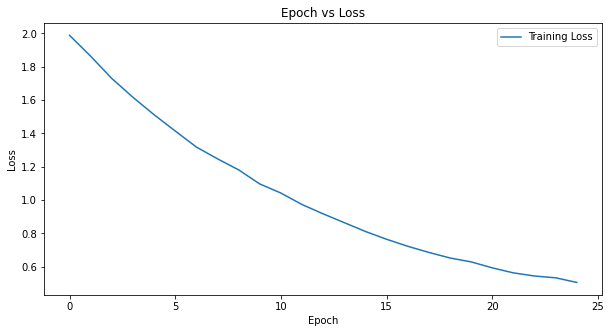

In [6]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel, TextDataset, DataCollatorForLanguageModeling, Trainer, TrainingArguments, TrainerCallback
import matplotlib.pyplot as plt

# Load the tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("surajp/gpt2-hindi")
model = GPT2LMHeadModel.from_pretrained("surajp/gpt2-hindi")

# Load the dataset
train_dataset = TextDataset(
    tokenizer=tokenizer,
    file_path="hindi_poem_cleaned.txt",
    block_size=128,
)

# Define the data collator
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=False,
)

# Define the training arguments with logging enabled
training_args = TrainingArguments(
    output_dir="./results",
    overwrite_output_dir=True,
    num_train_epochs=25,
    per_device_train_batch_size=16,
    save_steps=10_000,
    save_total_limit=200,
    logging_dir='./logs',  # Directory for storing logs
    logging_steps=50,  # Log loss every 50 steps
    learning_rate=1e-4,
    lr_scheduler_type="linear",
)

# Define the trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    data_collator=data_collator,
)

# Initialize a list to keep track of losses
loss_values = []

# Custom callback for Trainer to record loss after each epoch
class LossCallback(TrainerCallback):
    def on_epoch_end(self, args, state, control, **kwargs):
        loss_values.append(state.log_history[-1]['loss'])

# Add the callback to the trainer
trainer.add_callback(LossCallback)

# Train the model
trainer.train()

# Save model
output_model_dir = "./saved_model"
trainer.save_model(output_model_dir)
tokenizer.save_pretrained(output_model_dir)

# Plotting the loss values
plt.figure(figsize=(10, 5))
plt.plot(loss_values, label="Training Loss")
plt.title("Epoch vs Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [7]:
import re

def remove_words_in_parentheses(input_string):
    pattern = re.compile(r'\([^)]*\)')
    output_string = re.sub(pattern, '', input_string)
    return output_string



In [18]:
def generate_poem_with_rhyme(prompt_text, model, tokenizer, rhyme_scheme):
    # Move the input tensor to the same device as the model
    input_ids = tokenizer.encode(prompt_text, return_tensors="pt").to(model.device)
    
    # Generate the poem
    output = model.generate(input_ids, max_length=200, num_beams=5, no_repeat_ngram_size=2, top_k=50, top_p=0.95, temperature=0.7)
    
    # Decode the generated output
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

    lines = generated_text.split('\n')
    modified_lines = []

    for i, line in enumerate(lines):
        words = line.split()
        
        # Check if the words list is not empty
        if words:
            if i % len(rhyme_scheme) == 0:
                rhyming_word = words[-1]
            elif rhyme_scheme[i % len(rhyme_scheme)] == rhyme_scheme[(i - 1) % len(rhyme_scheme)]:
                rhyming_word = words[-1]
            else:
                rhyming_word = words[-2]

            modified_line = f"{line} ({rhyming_word})"
            modified_lines.append(modified_line)

    return modified_lines

# Example usage
prompt_text = "आकाश की ऊँचाई से नीचे"
rhyme_scheme = ["A", "B", "A", "C"]
modified_lines = generate_poem_with_rhyme(prompt_text, model, tokenizer, rhyme_scheme)

# Print or use the modified lines as needed
for line in modified_lines:
    input_text = line
    output_text = remove_words_in_parentheses(input_text)
    print(output_text)
    

आकाश की ऊँचाई से नीचे मेरे प्यार को जाता है 
मुझको अकेला तोड़ के चल दिये 
छोटी सी मुहब्बत में भी रस्में निभा देना 
हाय ग़ज़ब कहीं और न लाऊँ तुम्हें 
फिर न कहना ज़माने का डर दोनों कि महफ़िल्ल ये नहीं हैं 
किधर हो न कैसी दुश्मनी एक नक़्स्शएपीब फ़र इख्ती न दौराम पे रँगीर लौजी 
ल न करे ली ज 


In [3]:
#2

In [24]:
def generate_poem_with_rhyme(prompt_text, model, tokenizer, rhyme_scheme):
    # Move the input tensor to the same device as the model
    input_ids = tokenizer.encode(prompt_text, return_tensors="pt").to(model.device)
    
    # Generate the poem
    output = model.generate(input_ids, max_length=200, num_beams=5, no_repeat_ngram_size=2, top_k=50, top_p=0.95, temperature=0.7)
    
    # Decode the generated output
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

    lines = generated_text.split('\n')
    modified_lines = []

    for i, line in enumerate(lines):
        words = line.split()
        
        # Check if the words list is not empty
        if words:
            if i % len(rhyme_scheme) == 0:
                rhyming_word = words[-1]
            elif rhyme_scheme[i % len(rhyme_scheme)] == rhyme_scheme[(i - 1) % len(rhyme_scheme)]:
                rhyming_word = words[-1]
            else:
                rhyming_word = words[-2]

            modified_line = f"{line} ({rhyming_word})"
            modified_lines.append(modified_line)

    return modified_lines

# Example usage
prompt_text = "तुम ही हो "
rhyme_scheme = ["A", "B", "A", "C"]
modified_lines = generate_poem_with_rhyme(prompt_text, model, tokenizer, rhyme_scheme)

# Print or use the modified lines as needed
for line in modified_lines:
    input_text = line
    output_text = remove_words_in_parentheses(input_text)
    print(output_text)
    

तुम ही हो  
मेरे दिल के फूल चुरा तुमको खुदा की क़सम 
प्यार का रंग निखर जायेगा 
जिस्म को जिसने सम्भाला वो तूफ़ान हुआ 
उस से तो बेहतर है कि ज़मीन में साथ दूँ   
हो देख लें आँसू बहाकर हम लोग 
ऐसी बात नहीं हमें बंदिशाें हैं बग़ाहि वज़ैबीं 
कैसे लूबता मुख़्बू छेड़े ना रहें  
आयेंगी घटाियाँ 


In [23]:
#3

In [26]:
def generate_poem_with_rhyme(prompt_text, model, tokenizer, rhyme_scheme):
    # Move the input tensor to the same device as the model
    input_ids = tokenizer.encode(prompt_text, return_tensors="pt").to(model.device)
    
    # Generate the poem
    output = model.generate(input_ids, max_length=200, num_beams=5, no_repeat_ngram_size=2, top_k=50, top_p=0.95, temperature=0.7)
    
    # Decode the generated output
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

    lines = generated_text.split('\n')
    modified_lines = []

    for i, line in enumerate(lines):
        words = line.split()
        
        # Check if the words list is not empty
        if words:
            if i % len(rhyme_scheme) == 0:
                rhyming_word = words[-1]
            elif rhyme_scheme[i % len(rhyme_scheme)] == rhyme_scheme[(i - 1) % len(rhyme_scheme)]:
                rhyming_word = words[-1]
            else:
                rhyming_word = words[-2]

            modified_line = f"{line} ({rhyming_word})"
            modified_lines.append(modified_line)

    return modified_lines

# Example usage
prompt_text = "दोस्ती"
rhyme_scheme = ["A", "A", "A", "A"]
modified_lines = generate_poem_with_rhyme(prompt_text, model, tokenizer, rhyme_scheme)

# Print or use the modified lines as needed
for line in modified_lines:
    input_text = line
    output_text = remove_words_in_parentheses(input_text)
    print(output_text)
    

दोस्ती का साथ ना छोड़ेंगे हम 
क्या हुआ तेरा वफ़ा सब कुछ है जानेजहाँ 
तुझे मिलेगी निगाहों की ये सूरत 
हर खुशी से हर ज़िंदगी तुझको पुकारे 
आँसू आँखों में बहते हैं आशिक़ हर अपना 
जो भी होता रहे बस यूँही ख्वाब देज के दिन 
देते रहें हमेशा नज़र जो हँसते जुदा यूं ही रहते चुहाएं वो  
मितवा बेद  
आए 
